# FIFA PLAYER STATS ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from scipy import stats
import missingno as msno

In [2]:
#Importing data 
fifa_df = pd.read_csv(r'D:\\study\University of Leicester\\E-Sports\Project_Submission\\FIFA22_official_data.csv')
fifa_df
pd.set_option('display.max_columns',700)

In [3]:
fifa_df.shape

(16710, 65)

In [4]:
fifa_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,€125.5M,€350K,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2025,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,€37M,€45K,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [5]:
# Checking all the columns are available
fifa_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [6]:
# To see how the columns are distributed
fifa_df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16702.000000,16702.000000,16673.000000,16710.000000,16459.000000,892.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,15818.000000
mean,220560.467923,25.727409,67.646320,72.572292,1652.497307,1.169958,3.008199,2.475464,20.458643,52.212448,48.725075,54.123339,61.314423,45.652972,58.591203,50.574522,45.074087,55.454877,61.387433,65.684919,65.783124,65.222875,63.592400,64.943262,60.642190,65.896659,64.204548,66.266008,49.989228,57.955536,48.057418,53.150461,56.378936,50.615919,61.001883,48.021300,49.155536,46.830564,15.683662,15.521364,15.457989,15.581927,15.789228,68.565410,48.019408
std,38496.607959,5.048910,6.457695,5.688085,257.271696,0.485305,0.681742,0.791414,17.699813,17.772348,19.401715,17.007831,13.665353,17.828225,17.925005,18.237536,17.596471,14.494716,15.673348,15.005583,14.737924,14.512499,8.594003,14.257323,12.959795,12.285499,15.575110,12.624115,19.082943,16.855790,20.846484,19.204880,13.415572,15.756832,11.399833,21.904204,21.454857,21.175431,17.009757,16.302298,16.099993,16.584045,17.318251,6.256253,20.181354
min,27.000000,16.000000,28.000000,38.000000,571.000000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000,5.000000,8.000000,4.000000,5.000000,6.000000,4.000000,9.000000,8.000000,13.000000,15.000000,18.000000,28.000000,19.000000,12.000000,22.000000,13.000000,18.000000,4.000000,11.000000,4.000000,3.000000,10.000000,7.000000,12.000000,4.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,203891.250000,22.000000,63.000000,69.000000,1525.000000,1.000000,3.000000,2.000000,8.000000,42.000000,34.000000,46.000000,57.000000,33.000000,54.000000,39.000000,33.000000,47.000000,58.000000,58.000000,59.000000,57.000000,58.000000,57.000000,52.000000,59.000000,57.000000,59.000000,37.000000,47.000000,28.000000,44.000000,48.000000,41.000000,55.000000,27.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,30.000000
50%,229253.000000,25.000000,68.000000,72.000000,1687.000000,1.000000,3.000000,2.000000,17.000000,57.000000,53.000000,57.000000,64.000000,48.000000,63.500000,53.000000,44.000000,58.000000,65.000000,68.000000,68.000000,68.000000,64.000000,67.000000,62.000000,67.000000,67.000000,68.000000,55.000000,61.000000,55.000000,58.000000,58.000000,52.000000,62.000000,53.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,54.000000
75%,245368.750000,29.000000,72.000000,76.000000,1826.000000,1.000000,3.000000,3.000000,27.000000,65.000000,64.000000,66.000000,70.000000,59.000000,70.000000,64.000000,59.000000,66.000000,71.000000,76.000000,76.000000,75.000000,69.000000,75.000000,70.000000,74.000000,75.000000,75.000000,65.000000,71.000000,65.000000,67.000000,66.000000,62.000000,69.000000,67.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,264704.000000,54.000000,93.000000,95.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,95.000000,93.000000,94.000000,90.000000,96.000000,94.000000,94.000000,93.000000,96.000000,97.000000,97.000000,

In [7]:
# Making a copy 
fifa_copy = fifa_df.copy()

In [8]:
fifa_copy

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,€125.5M,€350K,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2025,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,€37M,€45K,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,€100K,€1K,782,Right,1.0,2.0,1.0,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES",31.0,"Jul 1, 2016",NaN,2019,188cm,80kg,12.0,5.0,13.0,18.0,7.0,12.0,11.0,13.0,19.0,10.0,15.0,21.0,34.0,30.0,31.0,16.0,51.0,26.0,57.0,6.0,16.0,9.0,5.0,29.0,18.0,37.0,5.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/pla

# 1.	Exploratory Data Analysis on FIFA22

In [9]:
# defining a function for cleaning the Value column

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [10]:
# applying the function to the clean wage column

fifa_df['Value'] = fifa_df['Value'].apply(lambda x: extract_value_from(x))
fifa_df['Wage'] = fifa_df['Wage'].apply(lambda x: extract_value_from(x))

fifa_df['Wage'].head()

0    250000.0
1    140000.0
2    135000.0
3    350000.0
4     45000.0
Name: Wage, dtype: float64

In [11]:
# defining a function for cleaning the Weight data

def extract_value_from(value):
  out = value.replace('kg', '')
  return float(out)

# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
fifa_df['Weight'] = fifa_df['Weight'].apply(lambda x : extract_value_from(x))

fifa_df['Weight'].head()

0    69.0
1    82.0
2    83.0
3    70.0
4    69.0
Name: Weight, dtype: float64

In [12]:
fifa_df["Value"]

0        107500000.0
1         93000000.0
2         44500000.0
3        125500000.0
4         37000000.0
            ...     
16705       100000.0
16706       180000.0
16707       100000.0
16708       110000.0
16709            0.0
Name: Value, Length: 16710, dtype: float64

In [13]:
fifa_df.shape

(16710, 65)

In [14]:
fifa_df['Wage']

0        250000.0
1        140000.0
2        135000.0
3        350000.0
4         45000.0
           ...   
16705      1000.0
16706       550.0
16707       700.0
16708       500.0
16709         0.0
Name: Wage, Length: 16710, dtype: float64

In [15]:
# It seems the value has changed
fifa_df["Wage"].isnull().sum()

0

In [16]:
# Sorting the column with value and deleting unwanted columns
fifa_df3=fifa_df.sort_values("Value", ascending=False, kind="mergesort")
to_drop = ["ID", "Flag","Photo","Club Logo"]
fifa_df4 = fifa_df3.drop(to_drop,axis=1)

In [17]:
# Checking position column
fifa_copy['Position'].isnull().sum()
fifa_copy['Position'].fillna('ST', inplace = True)

In [18]:
#Checkin for null in position column
fifa_df4['Position'].isnull().sum()

26

In [19]:
fifa_df4["Position"]

82        <span class="pos pos25">ST
251       <span class="pos pos24">RS
39        <span class="pos pos25">ST
64        <span class="pos pos27">LW
3        <span class="pos pos13">RCM
                    ...             
16527                            NaN
16540                            NaN
16572                            NaN
16585    <span class="pos pos28">SUB
16709    <span class="pos pos28">SUB
Name: Position, Length: 16710, dtype: object

In [20]:
fifa_df4['Position'].fillna('<span class="pos pos25">ST', inplace = True)

In [21]:
#Selecting the positional term only
fifa_df4['Position'] = fifa_df4['Position'].str.split(">")
fifa_df4['Position'] = fifa_df4['Position'].apply(lambda x:x[1])

In [22]:
fifa_df4['Position']

82        ST
251       RS
39        ST
64        LW
3        RCM
        ... 
16527     ST
16540     ST
16572     ST
16585    SUB
16709    SUB
Name: Position, Length: 16710, dtype: object

In [23]:
#After the first stage of cleaning 
fifa_df4[['Value', 'Wage', 'Position', 'Weight']]

,Value,Wage,Position,Weight
82,194000000.0,230000.0,ST,73.0
251,137500000.0,110000.0,RS,94.0
39,129500000.0,240000.0,ST,89.0
64,129000000.0,270000.0,LW,68.0
3,125500000.0,350000.0,RCM,70.0
...,...,...,...,...
16527,0.0,0.0,ST,82.0
16540,0.0,0.0,ST,70.0
16572,0.0,0.0,ST,81.0
16585,0.0,0.0,SUB,85.0


# fifa_df4

In [24]:
#Res, Sub
# RCM , LCM = CM
# RS, LS = ST
# RDM, LDM = CDM
#RAM, LAM = AM 
# LF, RF = CF
fifa_df4['Position'].unique()

array(['ST', 'RS', 'LW', 'RCM', 'GK', 'LM', 'RB', 'RDM', 'CAM', 'SUB',
       'RCB', 'RW', 'LDM', 'RM', 'CDM', 'LCB', 'LB', 'CM', 'LS', 'LCM',
       'CF', 'CB', 'RES', 'RWB', 'RAM', 'LWB', 'RF', 'LAM', 'LF'],
      dtype=object)

In [25]:
fifa_df5 = fifa_df4.copy()

In [26]:
#GK,RB,LB,RWB,LWB,CB,CDM,CM,CAM,RM,LM,RW,LW,RF,LF,CF,ST

In [27]:
replace_position = {'LCM':'CM', 'RS':'ST', 'LS':'ST', 'RDM':'CDM', 'LDM':'CDM', 'RAM':'CAM', 'LAM':'CAM', 'RCM':'CM' , 'RCB':'CB', 'LCB':'CB'}
fifa_df5 = fifa_df5.replace({"Position":replace_position})
fifa_df5['Position'].unique()

array(['ST', 'LW', 'CM', 'GK', 'LM', 'RB', 'CDM', 'CAM', 'SUB', 'CB',
       'RW', 'RM', 'LB', 'CF', 'RES', 'RWB', 'LWB', 'RF', 'LF'],
      dtype=object)

In [28]:
fifa_df5['Best Position'].unique()

array(['ST', 'LW', 'CM', 'GK', 'CAM', 'RB', 'CDM', 'LM', 'CB', 'RW', 'LB',
       'CF', 'RM', 'RWB', 'LWB'], dtype=object)

In [29]:
fifa_df5 = fifa_df5.sort_values("Overall", ascending=False)
fifa_df5

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
29,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,2219,Left,5.0,4.0,4.0,Medium/ Low,Unique,Yes,RW,30.0,"Aug 10, 2021",NaN,2023,170cm,72.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,NaN,35.0,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
33,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,2212,Right,5.0,4.0,4.0,High/ Medium,Unique,Yes,ST,9.0,"Jul 1, 2014",NaN,2023,185cm,81.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,NaN,42.0,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
36,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,2208,Right,5.0,4.0,5.0,High/ Low,Unique,Yes,ST,7.0,"Aug 27, 2021",NaN,2023,187cm,83.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0,ST,91.0,€83.3M,24.0
14244,J. Oblak,28,Slovenia,91,93,Atlético de Madrid,112000000.0,130000.0,1413,Right,5.0,3.0,1.0,Medium/ Medium,Unique,Yes,GK,13.0,"Jul 16, 2014",NaN,2023,188cm,87.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,NaN,12.0,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
82,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,2175,Right,4.0,4.0,5.0,High/ Low,Unique,Yes,ST,7.0,"Jul 1, 2018",NaN,2022,182cm,73.0,78.0,93.0,72.0,85.0,83.0,93.0,80.0,69.0,71.0,91.0,97.0,97.0,92.0,93.0,83.0,86.0,78.0,88.0,77.0,82.0,62.0,38.0,92.0,82.0,79.0,88.0,NaN,34.0,32.0,13.0,5.0,7.0,11.0,6.0,ST,92.0,€373.5M,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15593,18 T. Käßemodel,28,Germany,46,46,FC Erzgebirge Aue,30000.0,2000.0,1174,Right,1.0,3.0,2.0,Medium/ Medium,Stocky (170-185),No,RES,29.0,"Jul 1, 2016",NaN,2018,173cm,75.0,42.0,40.0,38.0,54.0,34.0,44.0,52.0,37.0,51.0,46.0,25.0,22.0,40.0,47.0,52.0,52.0,28.0,30.0,37.0,39.0,52.0,31.0,39.0,43.0,41.0,42.0,37.0,36.0,38.0,10.0,12.0,6.0,13.0,6.0,CM,45.0,€47K,NaN
15685,15 T. Fletcher,19,England,46,52,Wycombe Wanderers,20000.0,2000.0,1157,Right,1.0,2.0,2.0,Medium/ Medium,Lean (170-185),No,SUB,16.0,"Jul 9, 2013",NaN,2015,183cm,76.0,21.0,25.0,41.0,25.0,24.0,27.0,24.0,20.0,26.0,30.0,56.0,57.0,44.0,42.0,60.0,37.0,68.0,63.0,58.0,23.0,49.0,49.0,22.0,33.0,38.0,NaN,43.0,48.0,50.0,14.0,7.0,8.0,14.0,11.0,CB,46.0,NaN,NaN
16572,10 I. Baraclough,38,England,44,65,NaN,0.0,0.0,891,Left,2.0,3.0,1.0,N/A/ N/A,NaN,NaN,ST,NaN,NaN,NaN,NaN,185cm,81.0,26.0,20.0,41.0,51.0,NaN,32.0,NaN,29.0,46.0,47.0,25.0,26.0,NaN,39.0,NaN,24.0,NaN,45.0,54.0,20.0,44.0,61.0,55.0,NaN,57.0,NaN,43.0,41.0,NaN,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN
15999,16 E. Redman,18,Wales,44,57,Newport County,50000.0,2000.0,1089,Right,1.0,2.0,2.0,Medium/ Medium,Stocky (170-185),No,RES,49.0,"Oct 22, 2013",NaN,2016,184cm,81.0,26.0,16.0,42.0,37.0,15.0,20.0,22.0,19.0,34.0,27.0,65.0,66.0,52.0,37.0,55.0,23.0,62.0,56.0,66.0,18.0,51.0,36.0,15.0,23.0,32.0,NaN,41.0,43.0,38.0,13.0,7.0,16.0,9.0,7.0,CB,44.0,Na

In [30]:
fifa_df5.reset_index(drop=True, inplace=True)
fifa_df5

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,2219,Left,5.0,4.0,4.0,Medium/ Low,Unique,Yes,RW,30.0,"Aug 10, 2021",NaN,2023,170cm,72.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,NaN,35.0,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,2212,Right,5.0,4.0,4.0,High/ Medium,Unique,Yes,ST,9.0,"Jul 1, 2014",NaN,2023,185cm,81.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,NaN,42.0,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,2208,Right,5.0,4.0,5.0,High/ Low,Unique,Yes,ST,7.0,"Aug 27, 2021",NaN,2023,187cm,83.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0,ST,91.0,€83.3M,24.0
3,J. Oblak,28,Slovenia,91,93,Atlético de Madrid,112000000.0,130000.0,1413,Right,5.0,3.0,1.0,Medium/ Medium,Unique,Yes,GK,13.0,"Jul 16, 2014",NaN,2023,188cm,87.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,NaN,12.0,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
4,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,2175,Right,4.0,4.0,5.0,High/ Low,Unique,Yes,ST,7.0,"Jul 1, 2018",NaN,2022,182cm,73.0,78.0,93.0,72.0,85.0,83.0,93.0,80.0,69.0,71.0,91.0,97.0,97.0,92.0,93.0,83.0,86.0,78.0,88.0,77.0,82.0,62.0,38.0,92.0,82.0,79.0,88.0,NaN,34.0,32.0,13.0,5.0,7.0,11.0,6.0,ST,92.0,€373.5M,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,18 T. Käßemodel,28,Germany,46,46,FC Erzgebirge Aue,30000.0,2000.0,1174,Right,1.0,3.0,2.0,Medium/ Medium,Stocky (170-185),No,RES,29.0,"Jul 1, 2016",NaN,2018,173cm,75.0,42.0,40.0,38.0,54.0,34.0,44.0,52.0,37.0,51.0,46.0,25.0,22.0,40.0,47.0,52.0,52.0,28.0,30.0,37.0,39.0,52.0,31.0,39.0,43.0,41.0,42.0,37.0,36.0,38.0,10.0,12.0,6.0,13.0,6.0,CM,45.0,€47K,NaN
16706,15 T. Fletcher,19,England,46,52,Wycombe Wanderers,20000.0,2000.0,1157,Right,1.0,2.0,2.0,Medium/ Medium,Lean (170-185),No,SUB,16.0,"Jul 9, 2013",NaN,2015,183cm,76.0,21.0,25.0,41.0,25.0,24.0,27.0,24.0,20.0,26.0,30.0,56.0,57.0,44.0,42.0,60.0,37.0,68.0,63.0,58.0,23.0,49.0,49.0,22.0,33.0,38.0,NaN,43.0,48.0,50.0,14.0,7.0,8.0,14.0,11.0,CB,46.0,NaN,NaN
16707,10 I. Baraclough,38,England,44,65,NaN,0.0,0.0,891,Left,2.0,3.0,1.0,N/A/ N/A,NaN,NaN,ST,NaN,NaN,NaN,NaN,185cm,81.0,26.0,20.0,41.0,51.0,NaN,32.0,NaN,29.0,46.0,47.0,25.0,26.0,NaN,39.0,NaN,24.0,NaN,45.0,54.0,20.0,44.0,61.0,55.0,NaN,57.0,NaN,43.0,41.0,NaN,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN
16708,16 E. Redman,18,Wales,44,57,Newport County,50000.0,2000.0,1089,Right,1.0,2.0,2.0,Medium/ Medium,Stocky (170-185),No,RES,49.0,"Oct 22, 2013",NaN,2016,184cm,81.0,26.0,16.0,42.0,37.0,15.0,20.0,22.0,19.0,34.0,27.0,65.0,66.0,52.0,37.0,55.0,23.0,62.0,56.0,66.0,18.0,51.0,36.0,15.0,23.0,32.0,NaN,41.0,43.0,38.0,13.0,7.0,16.0,9.0,7.0,CB,44.0,NaN,NaN


In [31]:
fifa_df5.isnull().any()

Name                   False
Age                    False
Nationality            False
Overall                False
Potential              False
                       ...  
GKReflexes             False
Best Position          False
Best Overall Rating    False
Release Clause          True
DefensiveAwareness      True
Length: 61, dtype: bool

In [32]:
fifa_df5['Nationality'].value_counts().head(15)

England                1845
Spain                  1151
Germany                1120
France                  987
Argentina               846
Brazil                  819
Italy                   514
Netherlands             443
Portugal                354
United States           341
Mexico                  312
Republic of Ireland     308
Scotland                292
Japan                   284
Belgium                 267
Name: Nationality, dtype: int64

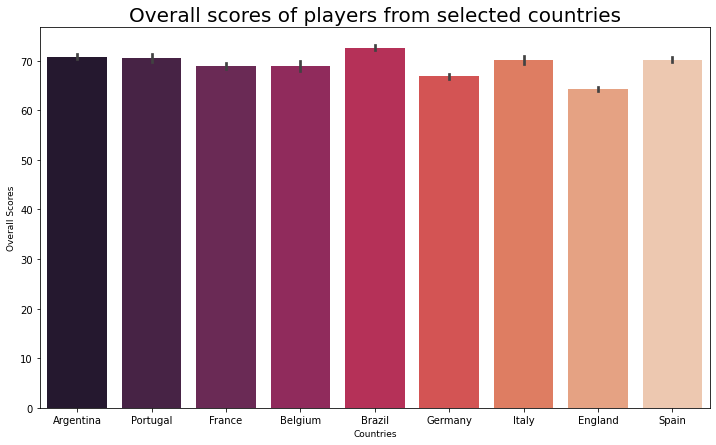

In [33]:
# Every Nations' Player and their overall scores

selected_countries = ('Brazil', 'England', 'Argentina','Germany', 'Spain', 'France', 'Italy', 'Portugal', 'Belgium')
data_countries = fifa_df5.loc[fifa_df5['Nationality'].isin(selected_countries) & fifa_df5['Overall']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'rocket')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Overall scores of players from selected countries', fontsize = 20)
plt.show()

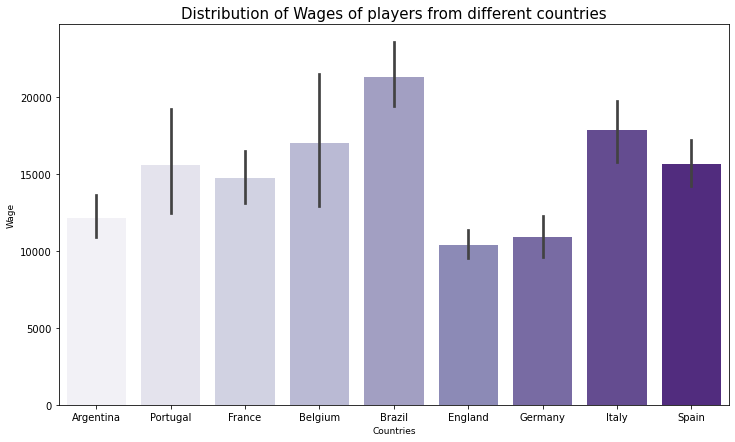

In [34]:
# Every Nations' Player and their wages

data_countries = fifa_df5.loc[fifa_df5['Nationality'].isin(selected_countries) & fifa_df5['Wage']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

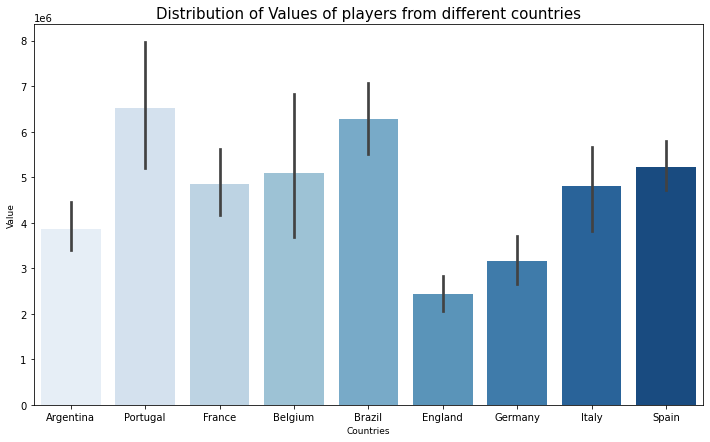

In [35]:
# Values of some selected nations players

data_countries = fifa_df5.loc[fifa_df5['Nationality'].isin(selected_countries) & fifa_df5['Value']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Value'], palette = 'Blues')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Value', fontsize = 9)
ax.set_title(label = 'Distribution of Values of players from different countries', fontsize = 15)
plt.show()

In [36]:
# Most Paid Players
player_name = fifa_df5[["Wage","Name","Best Overall Rating",'Age','Nationality','Potential','International Reputation']].nlargest(10, ['Wage']).set_index('Name')
#player_name['Wage'] = fifa_df["Wage"]
player_name

,Wage,Best Overall Rating,Age,Nationality,Potential,International Reputation
Name,,,,,,
K. De Bruyne,350000.0,91.0,30,Belgium,91,4.0
K. Benzema,350000.0,89.0,33,France,89,4.0
L. Messi,320000.0,93.0,34,Argentina,93,5.0
Casemiro,310000.0,89.0,29,Brazil,89,3.0
T. Kroos,310000.0,88.0,31,Germany,88,4.0
R. Sterling,290000.0,88.0,26,England,89,4.0
R. Lewandowski,270000.0,92.0,32,Poland,92,5.0
Cristiano Ronaldo,270000.0,91.0,36,Portugal,91,5.0
Neymar Jr,270000.0,91.0,29,Brazil,91,5.0


In [37]:
# Most Paid Players
player_name = fifa_df5[["Name","Value","Best Overall Rating",'Age','Nationality','Potential','International Reputation']].nlargest(10, ['Value']).set_index('Name')
player_name

,Value,Best Overall Rating,Age,Nationality,Potential,International Reputation
Name,,,,,,
K. Mbappé,194000000.0,92.0,22,France,95,4.0
E. Haaland,137500000.0,90.0,20,Norway,93,4.0
H. Kane,129500000.0,90.0,27,England,90,4.0
Neymar Jr,129000000.0,91.0,29,Brazil,91,5.0
K. De Bruyne,125500000.0,91.0,30,Belgium,91,4.0
R. Lewandowski,119500000.0,92.0,32,Poland,92,5.0
G. Donnarumma,119500000.0,89.0,22,Italy,93,3.0
F. de Jong,119500000.0,89.0,24,Netherlands,92,3.0
J. Sancho,116500000.0,88.0,21,England,91,3.0


In [38]:
#Top 10 players as per overall score
fifa_overall = fifa_df5.sort_values(['Overall'],ascending=False)[:10]
fifa_overall[['Name','Overall','Potential','Club','Preferred Foot','Position', 'Nationality']].style.background_gradient(cmap='Greens')

,Name,Overall,Potential,Club,Preferred Foot,Position,Nationality
0,L. Messi,93,93,Paris Saint-Germain,Left,RW,Argentina
1,R. Lewandowski,92,92,FC Bayern München,Right,ST,Poland
2,Cristiano Ronaldo,91,91,Manchester United,Right,ST,Portugal
3,J. Oblak,91,93,Atlético de Madrid,Right,GK,Slovenia
4,K. Mbappé,91,95,Paris Saint-Germain,Right,ST,France
5,K. De Bruyne,91,91,Manchester City,Right,CM,Belgium
6,Neymar Jr,91,91,Paris Saint-Germain,Right,LW,Brazil
7,H. Kane,90,90,Tottenham Hotspur,Right,ST,England
8,M. ter Stegen,90,92,FC Barcelona,Right,GK,Germany
9,M. Neuer,90,90,FC Bayern München,Right,GK,Germany


In [39]:
#Top 10 players as per potential score
fifa_potential = fifa_df5.sort_values(['Potential'],ascending=False)[:10]
fifa_potential[['Name','Overall','Potential','Club','Preferred Foot','Position']].style.background_gradient(cmap='Reds')

,Name,Overall,Potential,Club,Preferred Foot,Position
4,K. Mbappé,91,95,Paris Saint-Germain,Right,ST
0,L. Messi,93,93,Paris Saint-Germain,Left,RW
24,E. Haaland,88,93,Borussia Dortmund,Left,ST
21,G. Donnarumma,89,93,Paris Saint-Germain,Right,GK
3,J. Oblak,91,93,Atlético de Madrid,Right,GK
125,P. Foden,84,92,Manchester City,Left,SUB
116,K. Havertz,84,92,Chelsea,Left,LW
1,R. Lewandowski,92,92,FC Bayern München,Right,ST
43,F. de Jong,87,92,FC Barcelona,Right,CM
41,T. Alexander-Arnold,87,92,Liverpool,Right,RB


In [40]:
#Top speed player
player_name = fifa_df5[["Acceleration","Name","Best Position",'Age','Nationality','Club','SprintSpeed']].nlargest(10, ['Acceleration']).set_index('Name')
player_name

,Acceleration,Best Position,Age,Nationality,Club,SprintSpeed
Name,,,,,,
K. Mbappé,97.0,ST,22,France,Paris Saint-Germain,97.0
Adama Traoré,97.0,RM,25,Spain,Wolverhampton Wanderers,96.0
A. Davies,96.0,LB,20,Canada,FC Bayern München,96.0
M. Diaby,96.0,LM,21,France,Bayer 04 Leverkusen,92.0
D. James,96.0,RM,23,Wales,Leeds United,95.0
R. Sterling,95.0,LW,26,England,Manchester City,88.0
A. Hakimi,95.0,RB,22,Morocco,Paris Saint-Germain,95.0
Vinícius Jr.,95.0,RM,20,Brazil,Real Madrid CF,95.0
U. Antuna,95.0,RM,23,Mexico,Club Deportivo Guadalajara,90.0


In [41]:
# Best defencive players
player_name = fifa_df5[["DefensiveAwareness","Name","Best Position",'Age','Nationality', 'Club']].nlargest(10, ['DefensiveAwareness']).set_index('Name')
player_name

,DefensiveAwareness,Best Position,Age,Nationality,Club
Name,,,,,
G. Chiellini,93.0,CB,36,Italy,Juventus
V. van Dijk,92.0,CB,29,Netherlands,Liverpool
N. Kanté,90.0,CDM,30,France,Chelsea
Rúben Dias,90.0,CB,24,Portugal,Manchester City
K. Koulibaly,90.0,CB,30,Senegal,Napoli
M. Hummels,90.0,CB,32,Germany,Borussia Dortmund
M. Škriniar,90.0,CB,26,Slovakia,Inter
S. Savić,90.0,CB,30,Montenegro,Atlético de Madrid
20 D. De Rossi,90.0,CB,35,Italy,Boca Juniors


In [42]:
fifa_df5['Preferred Foot'].value_counts()

Right    12613
Left      4097
Name: Preferred Foot, dtype: int64

Text(0.5, 1.0, 'Preferred Foot of the Players')

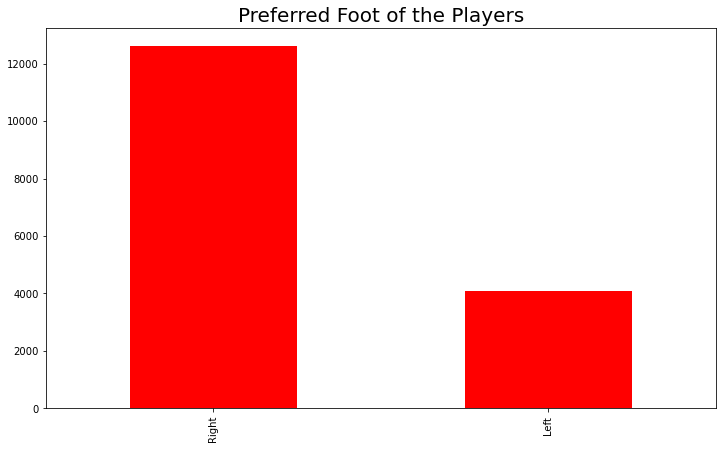

In [43]:
fifa_df5['Preferred Foot'].value_counts().head(50).plot.bar(color = 'red')
plt.title('Preferred Foot of the Players', fontsize = 20)

In [44]:
# Top 10 left footed footballers

fifa_df5[fifa_df5['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
0,L. Messi,34,Paris Saint-Germain,Argentina
11,Ederson,27,Manchester City,Brazil
12,M. Salah,29,Liverpool,Egypt
17,T. Courtois,29,Real Madrid CF,Belgium
24,E. Haaland,20,Borussia Dortmund,Norway
25,R. Lukaku,28,Chelsea,Belgium
33,07 P. Cocu,35,PSV,Netherlands
35,A. Di María,33,Paris Saint-Germain,Argentina
40,H. Lloris,34,Tottenham Hotspur,France
42,A. Robertson,27,Liverpool,Scotland


In [45]:
# Top 10 Right footed footballers

fifa_df5[fifa_df5['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
1,R. Lewandowski,32,FC Bayern München,Poland
2,Cristiano Ronaldo,36,Manchester United,Portugal
3,J. Oblak,28,Atlético de Madrid,Slovenia
4,K. Mbappé,22,Paris Saint-Germain,France
5,K. De Bruyne,30,Manchester City,Belgium
6,Neymar Jr,29,Paris Saint-Germain,Brazil
7,H. Kane,27,Tottenham Hotspur,England
8,M. ter Stegen,29,FC Barcelona,Germany
9,M. Neuer,35,FC Bayern München,Germany
10,N. Kanté,30,Chelsea,France


In [46]:
fifa_df5['Best Position'].value_counts()

CB     3214
ST     2549
CAM    2203
GK     1546
RM     1313
CDM    1262
CM     1011
RB      856
LB      813
LM      745
RW      335
RWB     310
LWB     289
LW      182
CF       82
Name: Best Position, dtype: int64

C:\Users\ARSHAD M K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


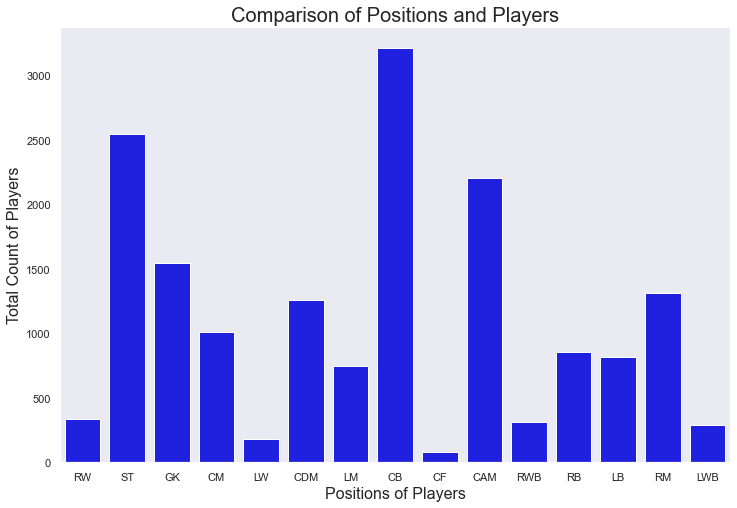

In [47]:
# different positions count of the players 

plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'flare', color_codes = True)
ax = sns.countplot('Best Position', data = fifa_df5, color = 'blue')
ax.set_xlabel(xlabel = 'Positions of Players', fontsize = 16)
ax.set_ylabel(ylabel = 'Total Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

C:\Users\ARSHAD M K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


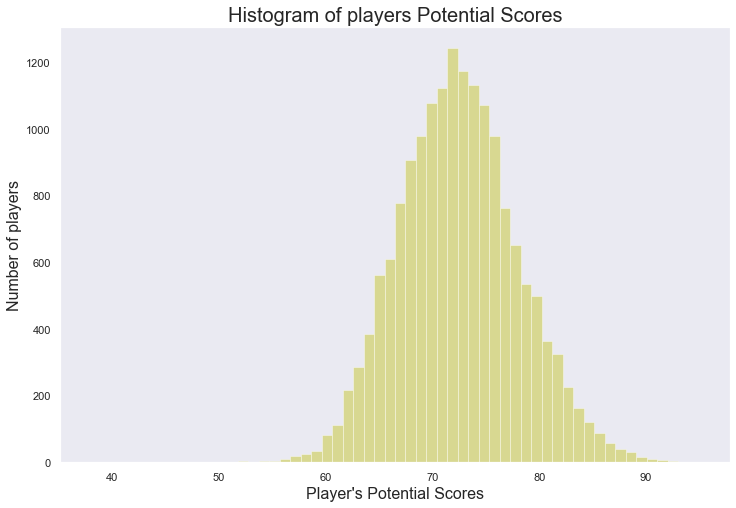

In [48]:
# To show Different potential scores of the players participating in the FIFA 2019

x = fifa_df5.Potential
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()

In [49]:
#Definig seperate function of their features 
def defending(fifa_df5):
    return int(round((fifa_df5[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(fifa_df5):
    return int(round((fifa_df5[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(fifa_df5):
    return int(round((fifa_df5[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(fifa_df5):
    return int(round((fifa_df5[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(fifa_df5):
    return int(round((fifa_df5[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(fifa_df5):
    return int(round((fifa_df5[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(fifa_df5):
    return int(round((fifa_df5[['Potential', 'Overall']].mean()).mean()))

def shooting(fifa_df5):
    return int(round((fifa_df5[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [50]:
# adding these categories to the data

fifa_df5['Defending'] = fifa_df5.apply(defending, axis = 1)
fifa_df5['General'] = fifa_df5.apply(general, axis = 1)
fifa_df5['Mental'] = fifa_df5.apply(mental, axis = 1)
fifa_df5['Passing'] = fifa_df5.apply(passing, axis = 1)
fifa_df5['Mobility'] = fifa_df5.apply(mobility, axis = 1)
fifa_df5['Power'] = fifa_df5.apply(power, axis = 1)
fifa_df5['Rating'] = fifa_df5.apply(rating, axis = 1)
fifa_df5['Shooting'] = fifa_df5.apply(shooting, axis = 1)

In [51]:
fifa_players = fifa_df5[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Age',
                'Nationality','Club']]

fifa_players.head(10)

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Age,Nationality,Club
0,L. Messi,30,89,74,89,89,76,93,89,34,Argentina,Paris Saint-Germain
1,R. Lewandowski,30,86,79,75,82,82,92,89,32,Poland,FC Bayern München
2,Cristiano Ronaldo,28,87,72,81,88,81,91,90,36,Portugal,Manchester United
3,J. Oblak,15,18,39,32,64,62,92,20,28,Slovenia,Atlético de Madrid
4,K. Mbappé,33,84,72,78,95,82,93,82,22,France,Paris Saint-Germain
5,K. De Bruyne,59,80,83,94,80,76,91,85,30,Belgium,Manchester City
6,Neymar Jr,30,85,74,84,92,70,91,85,29,Brazil,Paris Saint-Germain
7,H. Kane,37,84,79,84,76,79,90,86,27,England,Tottenham Hotspur
8,M. ter Stegen,12,20,43,47,53,59,91,24,29,Germany,FC Barcelona
9,M. Neuer,10,29,42,48,63,59,90,28,35,Germany,FC Bayern München


# Best players per each position with their age, club, and nationality based on their overall and Potential scores

In [52]:
# best players per each position with their age, club, and nationality based on their overall scores

fifa_df5.iloc[fifa_df5.groupby(fifa_df5['Best Position'])['Overall'].idxmax()][['Best Position', 'Name', 'Age', 'Club', 'Nationality', 'Overall']]

,Best Position,Name,Age,Club,Nationality,Overall
28,CAM,Bruno Fernandes,26,Manchester United,Portugal,88
16,CB,V. van Dijk,29,Liverpool,Netherlands,89
10,CDM,N. Kanté,30,Chelsea,France,90
20,CF,K. Benzema,33,Real Madrid CF,France,89
5,CM,K. De Bruyne,30,Manchester City,Belgium,91
3,GK,J. Oblak,28,Atlético de Madrid,Slovenia,91
42,LB,A. Robertson,27,Liverpool,Scotland,87
15,LM,H. Son,28,Tottenham Hotspur,Korea Republic,89
6,LW,Neymar Jr,29,Paris Saint-Germain,Brazil,91
95,LWB,19 Filipe Luís,32,Atlético de Madrid,Brazil,85


In [53]:
# best players from each positions with their age, nationality, club based on their potential scores

fifa_df5.iloc[fifa_df5.groupby(fifa_df5['Best Position'])['Potential'].idxmax()][['Best Position', 'Name', 'Age', 'Club', 'Nationality', 'Potential']]

,Best Position,Name,Age,Club,Nationality,Potential
116,CAM,K. Havertz,22,Chelsea,Germany,92
48,CB,Rúben Dias,24,Manchester City,Portugal,91
10,CDM,N. Kanté,30,Chelsea,France,90
20,CF,K. Benzema,33,Real Madrid CF,France,89
43,CM,F. de Jong,24,FC Barcelona,Netherlands,92
3,GK,J. Oblak,28,Atlético de Madrid,Slovenia,93
131,LB,T. Hernández,23,AC Milan,France,90
15,LM,H. Son,28,Tottenham Hotspur,Korea Republic,89
6,LW,Neymar Jr,29,Paris Saint-Germain,Brazil,91
888,LWB,Nuno Mendes,19,Paris Saint-Germain,Portugal,88


In [54]:
# finding the popular clubs around the globe

fifa_df5['Club'].value_counts().head(10)

AC Milan                  47
Lazio                     45
Inter                     42
FC Lokomotiv Moscow       42
Cádiz CF                  42
Genoa                     41
Paris Saint-Germain       41
Real Betis Balompié       41
Olympique de Marseille    41
Cagliari                  41
Name: Club, dtype: int64

# Analysing on the different positions and find out the best and skilful players for these positions

In [55]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in fifa_df5.groupby(fifa_df5['Best Position'])[player_features].mean().iterrows():
    print('Best Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Best Position CAM: Agility, Balance, Acceleration
Best Position CB: Jumping, Aggression, Marking
Best Position CDM: Aggression, BallControl, Interceptions
Best Position CF: BallControl, Dribbling, Agility
Best Position CM: BallControl, LongPassing, Balance
Best Position GK: GKReflexes, GKDiving, GKPositioning
Best Position LB: Acceleration, Agility, Balance
Best Position LM: Acceleration, Agility, Balance
Best Position LW: Agility, Acceleration, Balance
Best Position LWB: Acceleration, Balance, Agility
Best Position RB: Acceleration, Agility, Balance
Best Position RM: Acceleration, Agility, Balance
Best Position RW: Acceleration, Agility, Balance
Best Position RWB: Acceleration, Agility, Balance
Best Position ST: Jumping, Acceleration, Finishing


<ipython-input-55-acf45776e892>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for i, val in fifa_df5.groupby(fifa_df5['Best Position'])[player_features].mean().iterrows():


<ipython-input-56-71b71bbad79b>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for position_name, features in fifa_df5.groupby(fifa_df5['Best Position'])[player_features].mean().iterrows():


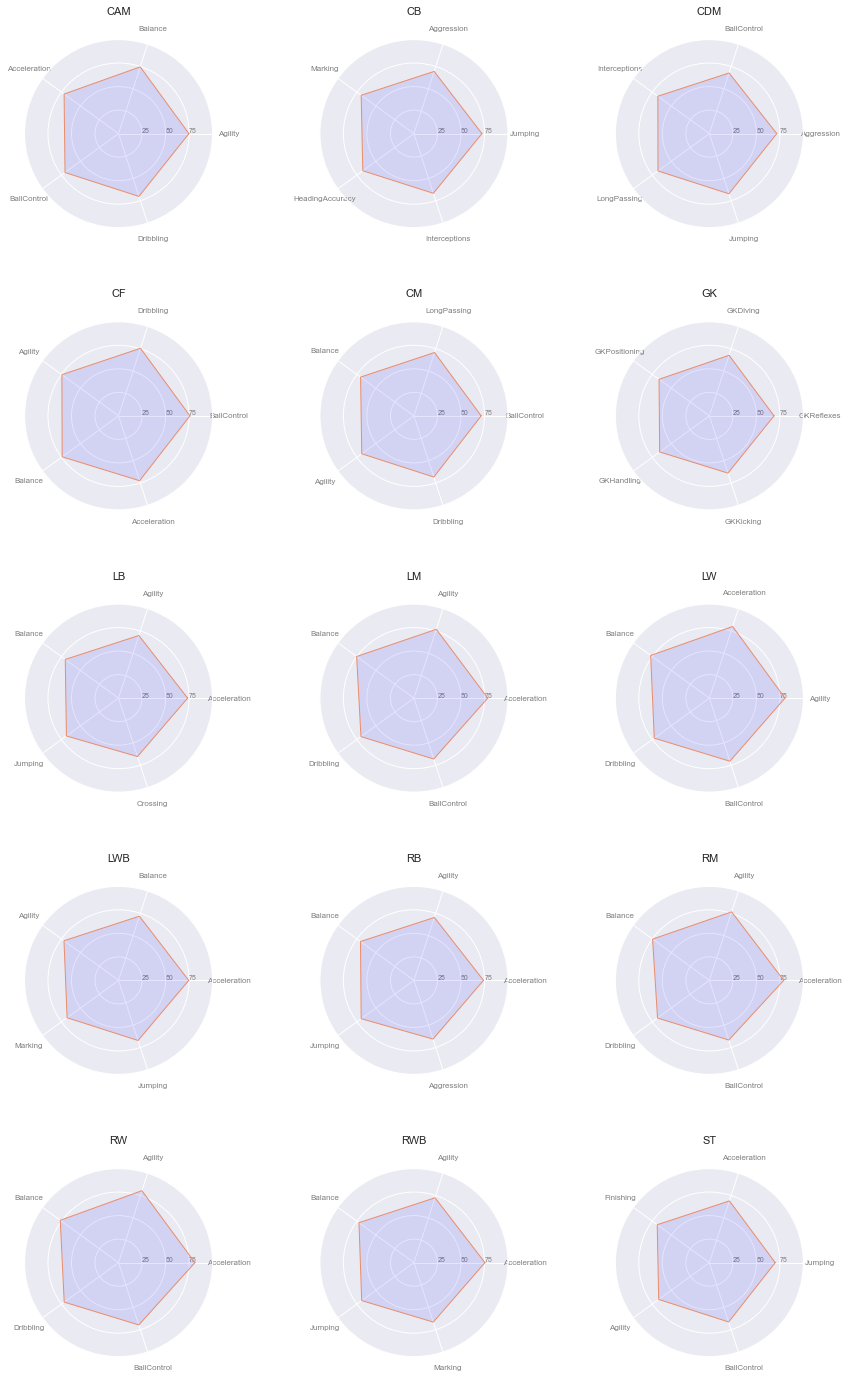

In [56]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in fifa_df5.groupby(fifa_df5['Best Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

In [57]:
fifa_df5["Best Position"].value_counts()

CB     3214
ST     2549
CAM    2203
GK     1546
RM     1313
CDM    1262
CM     1011
RB      856
LB      813
LM      745
RW      335
RWB     310
LWB     289
LW      182
CF       82
Name: Best Position, dtype: int64

In [58]:
fifa_df5

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,2219,Left,5.0,4.0,4.0,Medium/ Low,Unique,Yes,RW,30.0,"Aug 10, 2021",NaN,2023,170cm,72.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,NaN,35.0,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0,30,89,74,89,89,76,93,89
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,2212,Right,5.0,4.0,4.0,High/ Medium,Unique,Yes,ST,9.0,"Jul 1, 2014",NaN,2023,185cm,81.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,NaN,42.0,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0,30,86,79,75,82,82,92,89
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,2208,Right,5.0,4.0,5.0,High/ Low,Unique,Yes,ST,7.0,"Aug 27, 2021",NaN,2023,187cm,83.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0,ST,91.0,€83.3M,24.0,28,87,72,81,88,81,91,90
3,J. Oblak,28,Slovenia,91,93,Atlético de Madrid,112000000.0,130000.0,1413,Right,5.0,3.0,1.0,Medium/ Medium,Unique,Yes,GK,13.0,"Jul 16, 2014",NaN,2023,188cm,87.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,NaN,12.0,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0,15,18,39,32,64,62,92,20
4,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,2175,Right,4.0,4.0,5.0,High/ Low,Unique,Yes,ST,7.0,"Jul 1, 2018",NaN,2022,182cm,73.0,78.0,93.0,72.0,85.0,83.0,93.0,80.0,69.0,71.0,91.0,97.0,97.0,92.0,93.0,83.0,86.0,78.0,88.0,77.0,82.0,62.0,38.0,92.0,82.0,79.0,88.0,NaN,34.0,32.0,13.0,5.0,7.0,11.0,6.0,ST,92.0,€373.5M,26.0,33,84,72,78,95,82,93,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,18 T. Käßemodel,28,Germany,46,46,FC Erzgebirge Aue,30000.0,2000.0,1174,Right,1.0,3.0,2.0,Medium/ Medium,Stocky (170-185),No,RES,29.0,"Jul 1, 2016",NaN,2018,173cm,75.0,42.0,40.0,38.0,54.0,34.0,44.0,52.0,37.0,51.0,46.0,25.0,22.0,40.0,47.0,52.0,52.0,28.0,30.0,37.0,39.0,52.0,31.0,39.0,43.0,41.0,42.0,37.0,36.0,38.0,10.0,12.0,6.0,13.0,6.0,CM,45.0,€47K,NaN,37,45,41,49,34,37,46,40
16706,15 T. Fletcher,19,England,46,52,Wycombe Wanderers,20000.0,2000.0,1157,Right,1.0,2.0,2.0,Medium/ Medium,Lean (170-185),No,SUB,16.0,"Jul 9, 2013",NaN,2015,183cm,76.0,21.0,25.0,41.0,25.0,24.0,27.0,24.0,20.0,26.0,30.0,56.0,57.0,44.0,42.0,60.0,37.0,68.0,63.0,58.0,23.0,49.0,49.0,22.0,33.0,38.0,NaN,43.0,48.0,50.0,14.0,7.0,8.0,14.0,11.0,CB,46.0,NaN,NaN,47,30,38,24,50,62,49,28
16707,10 I. Baraclough,38,England,44,65,NaN,0.0,0.0,891,Left,2.0,3.0,1.0,N/A/ N/A,NaN,NaN,ST,NaN,NaN,NaN,NaN,185cm,81.0,26.0,20.0,41.0,51.0,NaN,32.0,NaN,29.0,46.0,47.0,25.0,26.0,NaN,39.0,NaN,24.0,NaN,45.0,54.0,20.0,44.0,61.0,55.0,NaN,57.0,NaN,43.0,41.0,NaN,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN,42,40,53,41,30,50,54,30
16708,16 E. Redman,18,Wales,44,57,Newport County,50000.0,2000.

[]

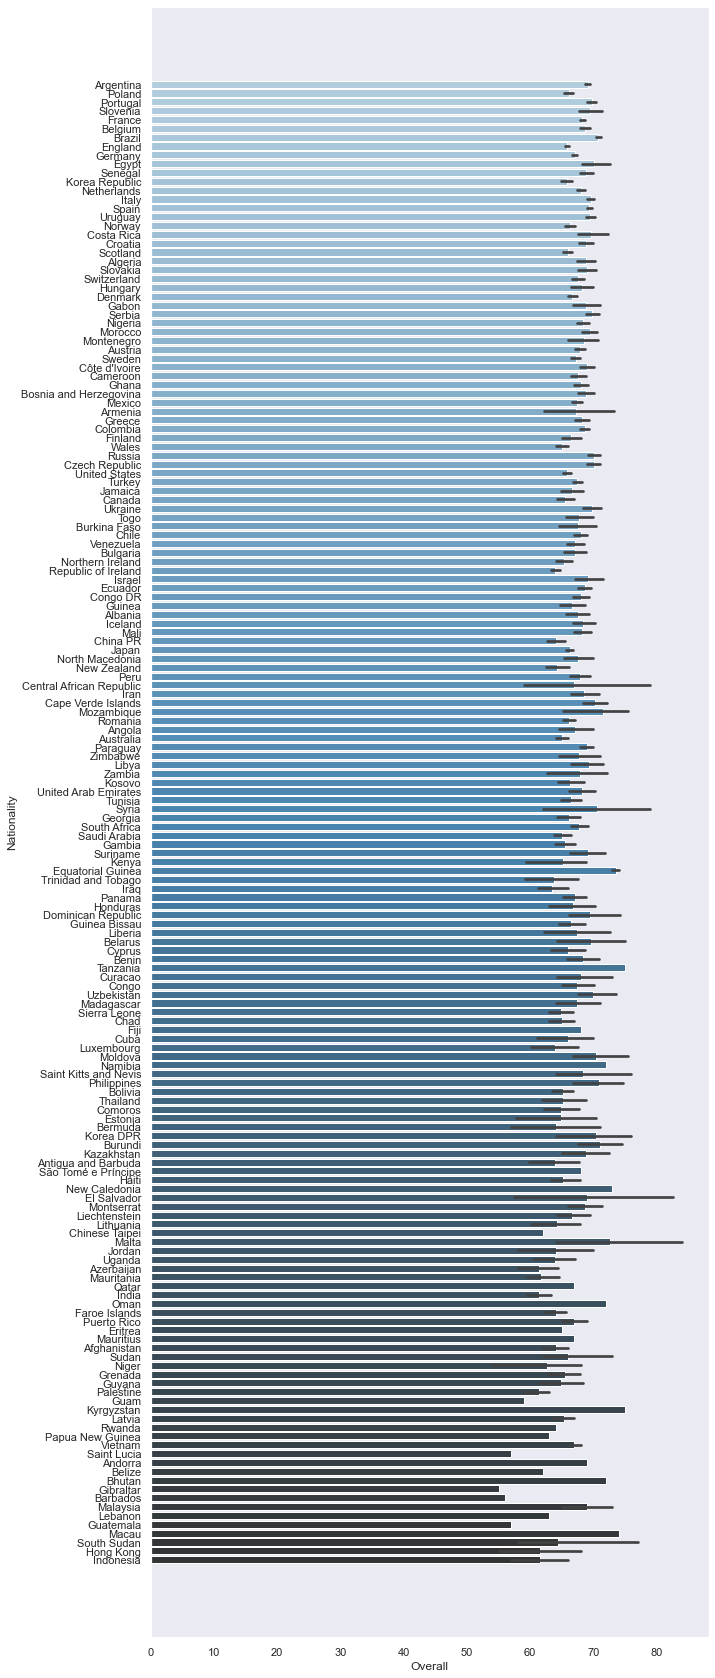

In [59]:
import seaborn as sns
import plotly.express as px
plt.figure(figsize=(10,30))
sns.barplot(y=fifa_df5['Nationality'],x=fifa_df4['Overall'],
            palette="Blues_d")
plt.plot()

# Predicting Overall Value using features

In [60]:
columns = ['Overall','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
player_df = fifa_df4[columns]
player_df.head()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
82,91,78.0,93.0,72.0,85.0,83.0,93.0,80.0,69.0,71.0,91.0,97.0,97.0,92.0,93.0,83.0,86.0,78.0,88.0,77.0,82.0,62.0,38.0,92.0,82.0,79.0,88.0,NaN,34.0,32.0,13.0,5.0,7.0,11.0,6.0
251,88,47.0,94.0,69.0,77.0,88.0,78.0,77.0,62.0,51.0,85.0,82.0,94.0,75.0,88.0,72.0,94.0,74.0,82.0,93.0,87.0,85.0,43.0,89.0,71.0,76.0,84.0,NaN,43.0,30.0,7.0,14.0,13.0,11.0,7.0
39,90,80.0,94.0,86.0,85.0,88.0,83.0,83.0,65.0,86.0,85.0,65.0,74.0,71.0,92.0,70.0,91.0,79.0,83.0,85.0,86.0,80.0,44.0,94.0,87.0,91.0,91.0,NaN,36.0,38.0,8.0,10.0,11.0,14.0,11.0
64,91,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,NaN,32.0,29.0,9.0,9.0,15.0,15.0,11.0
3,91,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0


In [61]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 82 to 16709
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall          16710 non-null  int64  
 1   Crossing         16710 non-null  float64
 2   Finishing        16710 non-null  float64
 3   HeadingAccuracy  16710 non-null  float64
 4   ShortPassing     16710 non-null  float64
 5   Volleys          16673 non-null  float64
 6   Dribbling        16710 non-null  float64
 7   Curve            16673 non-null  float64
 8   FKAccuracy       16710 non-null  float64
 9   LongPassing      16710 non-null  float64
 10  BallControl      16710 non-null  float64
 11  Acceleration     16710 non-null  float64
 12  SprintSpeed      16710 non-null  float64
 13  Agility          16673 non-null  float64
 14  Reactions        16710 non-null  float64
 15  Balance          16673 non-null  float64
 16  ShotPower        16710 non-null  float64
 17  Jumping    

In [62]:
player_df.isnull().any()

Overall            False
Crossing           False
Finishing          False
HeadingAccuracy    False
ShortPassing       False
Volleys             True
Dribbling          False
Curve               True
FKAccuracy         False
LongPassing        False
BallControl        False
Acceleration       False
SprintSpeed        False
Agility             True
Reactions          False
Balance             True
ShotPower          False
Jumping             True
Stamina            False
Strength           False
LongShots          False
Aggression         False
Interceptions       True
Positioning         True
Vision              True
Penalties          False
Composure           True
Marking             True
StandingTackle     False
SlidingTackle       True
GKDiving           False
GKHandling         False
GKKicking          False
GKPositioning      False
GKReflexes         False
dtype: bool

In [63]:
player_df['Composure']

82       88.0
251      84.0
39       91.0
64       93.0
3        89.0
         ... 
16527    31.0
16540    40.0
16572     NaN
16585    39.0
16709     NaN
Name: Composure, Length: 16710, dtype: float64

# Cleaning the features data

In [64]:
player_df['Marking'].fillna(player_df['Marking'].mean(), inplace = True)
player_df['Volleys'].fillna(player_df['Volleys'].mean(), inplace = True)
player_df['Curve'].fillna(player_df['Curve'].mean(), inplace = True)
player_df['Agility'].fillna(player_df['Agility'].mean(), inplace = True)
player_df['Balance'].fillna(player_df['Balance'].mean(), inplace = True)
player_df['Jumping'].fillna(player_df['Jumping'].mean(), inplace = True)
player_df['Interceptions'].fillna(player_df['Interceptions'].mean(), inplace = True)
player_df['Positioning'].fillna(player_df['Positioning'].mean(), inplace = True)
player_df['Vision'].fillna(player_df['Vision'].mean(), inplace = True)
player_df['Marking'].fillna(player_df['Marking'].mean(), inplace = True)
player_df['SlidingTackle'].fillna(player_df['SlidingTackle'].mean(), inplace = True)
player_df['Composure'].fillna(player_df['Composure'].mean(), inplace = True)

C:\Users\ARSHAD M K\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [65]:
player_df.isnull().any()

Overall            False
Crossing           False
Finishing          False
HeadingAccuracy    False
ShortPassing       False
Volleys            False
Dribbling          False
Curve              False
FKAccuracy         False
LongPassing        False
BallControl        False
Acceleration       False
SprintSpeed        False
Agility            False
Reactions          False
Balance            False
ShotPower          False
Jumping            False
Stamina            False
Strength           False
LongShots          False
Aggression         False
Interceptions      False
Positioning        False
Vision             False
Penalties          False
Composure          False
Marking            False
StandingTackle     False
SlidingTackle      False
GKDiving           False
GKHandling         False
GKKicking          False
GKPositioning      False
GKReflexes         False
dtype: bool

In [66]:
player_df.reset_index(drop=True, inplace=True)

In [67]:
player_df.isnull().any()

Overall            False
Crossing           False
Finishing          False
HeadingAccuracy    False
ShortPassing       False
Volleys            False
Dribbling          False
Curve              False
FKAccuracy         False
LongPassing        False
BallControl        False
Acceleration       False
SprintSpeed        False
Agility            False
Reactions          False
Balance            False
ShotPower          False
Jumping            False
Stamina            False
Strength           False
LongShots          False
Aggression         False
Interceptions      False
Positioning        False
Vision             False
Penalties          False
Composure          False
Marking            False
StandingTackle     False
SlidingTackle      False
GKDiving           False
GKHandling         False
GKKicking          False
GKPositioning      False
GKReflexes         False
dtype: bool

In [68]:
player_df

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,91,78.0,93.0,72.0,85.0,83.000000,93.0,80.000000,69.0,71.0,91.0,97.0,97.0,92.000000,93.0,83.000000,86.0,78.000000,88.0,77.0,82.0,62.0,38.000000,92.000000,82.000000,79.0,88.000000,48.0213,34.0,32.000000,13.0,5.0,7.0,11.0,6.0
1,88,47.0,94.0,69.0,77.0,88.000000,78.0,77.000000,62.0,51.0,85.0,82.0,94.0,75.000000,88.0,72.000000,94.0,74.000000,82.0,93.0,87.0,85.0,43.000000,89.000000,71.000000,76.0,84.000000,48.0213,43.0,30.000000,7.0,14.0,13.0,11.0,7.0
2,90,80.0,94.0,86.0,85.0,88.000000,83.0,83.000000,65.0,86.0,85.0,65.0,74.0,71.000000,92.0,70.000000,91.0,79.000000,83.0,85.0,86.0,80.0,44.000000,94.000000,87.000000,91.0,91.000000,48.0213,36.0,38.000000,8.0,10.0,11.0,14.0,11.0
3,91,85.0,83.0,63.0,86.0,86.000000,95.0,88.000000,87.0,81.0,95.0,93.0,89.0,96.000000,89.0,84.000000,80.0,64.000000,81.0,53.0,81.0,63.0,37.000000,86.000000,90.000000,93.0,93.000000,48.0213,32.0,29.000000,9.0,9.0,15.0,15.0,11.0
4,91,94.0,82.0,55.0,94.0,82.000000,88.0,85.000000,83.0,93.0,91.0,76.0,76.0,79.000000,91.0,78.000000,91.0,63.000000,89.0,74.0,91.0,76.0,66.000000,88.000000,94.000000,83.0,89.000000,48.0213,65.0,53.000000,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,59,13.0,9.0,10.0,24.0,6.000000,13.0,10.000000,10.0,17.0,16.0,34.0,33.0,23.000000,54.0,47.000000,44.0,60.000000,26.0,46.0,8.0,24.0,10.000000,5.000000,30.000000,19.0,31.000000,48.0213,10.0,11.000000,59.0,55.0,58.0,58.0,60.0
16706,58,12.0,5.0,10.0,20.0,6.000000,5.0,14.000000,13.0,20.0,16.0,33.0,40.0,38.000000,55.0,43.000000,38.0,50.000000,27.0,47.0,7.0,26.0,14.000000,8.000000,29.000000,18.0,40.000000,48.0213,13.0,10.000000,56.0,59.0,51.0,55.0,60.0
16707,44,26.0,20.0,41.0,51.0,45.652972,32.0,50.574522,29.0,46.0,47.0,25.0,26.0,65.222875,39.0,64.943262,24.0,65.896659,45.0,54.0,20.0,44.0,61.000000,55.000000,56.378936,57.0,61.001883,43.0000,41.0,46.830564,5.0,20.0,46.0,20.0,20.0
16708,61,15.0,9.0,13.0,19.0,8.000000,6.0,15.000000,11.0,24.0,15.0,30.0,19.0,25.000000,47.0,30.000000,39.0,35.000000,17.0,65.0,10.0,27.0,15.000000,8.000000,35.000000,20.0,39.000000,48.0213,12.0,11.000000,66.0,58.0,52.0,58.0,66.0


In [69]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall          16710 non-null  int64  
 1   Crossing         16710 non-null  float64
 2   Finishing        16710 non-null  float64
 3   HeadingAccuracy  16710 non-null  float64
 4   ShortPassing     16710 non-null  float64
 5   Volleys          16710 non-null  float64
 6   Dribbling        16710 non-null  float64
 7   Curve            16710 non-null  float64
 8   FKAccuracy       16710 non-null  float64
 9   LongPassing      16710 non-null  float64
 10  BallControl      16710 non-null  float64
 11  Acceleration     16710 non-null  float64
 12  SprintSpeed      16710 non-null  float64
 13  Agility          16710 non-null  float64
 14  Reactions        16710 non-null  float64
 15  Balance          16710 non-null  float64
 16  ShotPower        16710 non-null  float64
 17  Jumping     

In [70]:
player_df.shape

(16710, 35)

# Hisogram for every features

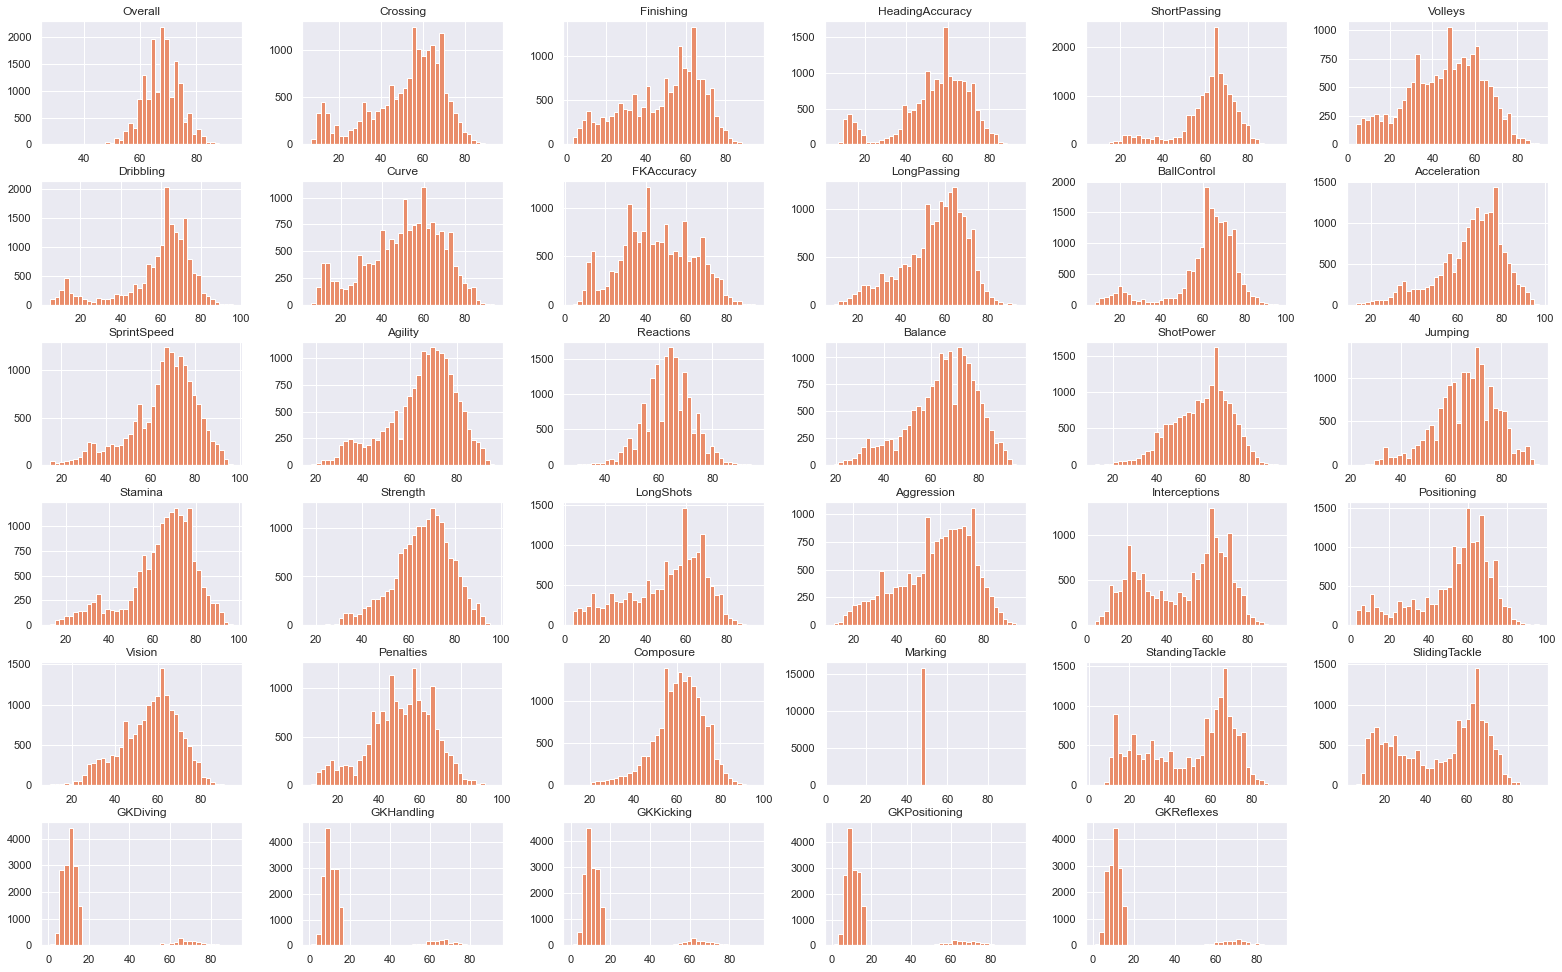

In [71]:
player_df.hist(bins=40, figsize=(27,17))
plt.show()

In [72]:
player_df.isna().any()

Overall            False
Crossing           False
Finishing          False
HeadingAccuracy    False
ShortPassing       False
Volleys            False
Dribbling          False
Curve              False
FKAccuracy         False
LongPassing        False
BallControl        False
Acceleration       False
SprintSpeed        False
Agility            False
Reactions          False
Balance            False
ShotPower          False
Jumping            False
Stamina            False
Strength           False
LongShots          False
Aggression         False
Interceptions      False
Positioning        False
Vision             False
Penalties          False
Composure          False
Marking            False
StandingTackle     False
SlidingTackle      False
GKDiving           False
GKHandling         False
GKKicking          False
GKPositioning      False
GKReflexes         False
dtype: bool

In [73]:
#spliting to train and test data 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(player_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(player_df))

Length of training data: 13368
Length of testing data: 3342
Length of total data: 16710


# Correlations with every features

In [74]:
#Correlations
fifa_df = train_set.copy()
corr_matrix = fifa_df.corr()
corr_matrix['Overall'].sort_values(ascending=False)

Overall            1.000000
Reactions          0.870103
Composure          0.678221
ShotPower          0.521107
Vision             0.502489
ShortPassing       0.494055
LongPassing        0.485379
BallControl        0.422879
Curve              0.377957
Aggression         0.371009
LongShots          0.369671
Crossing           0.366815
FKAccuracy         0.345707
Volleys            0.342844
Dribbling          0.337564
Positioning        0.325264
Strength           0.322492
Stamina            0.318773
Penalties          0.309715
HeadingAccuracy    0.309546
Interceptions      0.297158
Finishing          0.292795
StandingTackle     0.240179
Jumping            0.237655
SlidingTackle      0.213662
Agility            0.192575
SprintSpeed        0.127681
Acceleration       0.117614
Balance            0.086886
Marking            0.034770
GKPositioning      0.023440
GKKicking          0.022096
GKReflexes         0.020277
GKHandling         0.018943
GKDiving           0.016823
Name: Overall, dtype

# Scatter plot

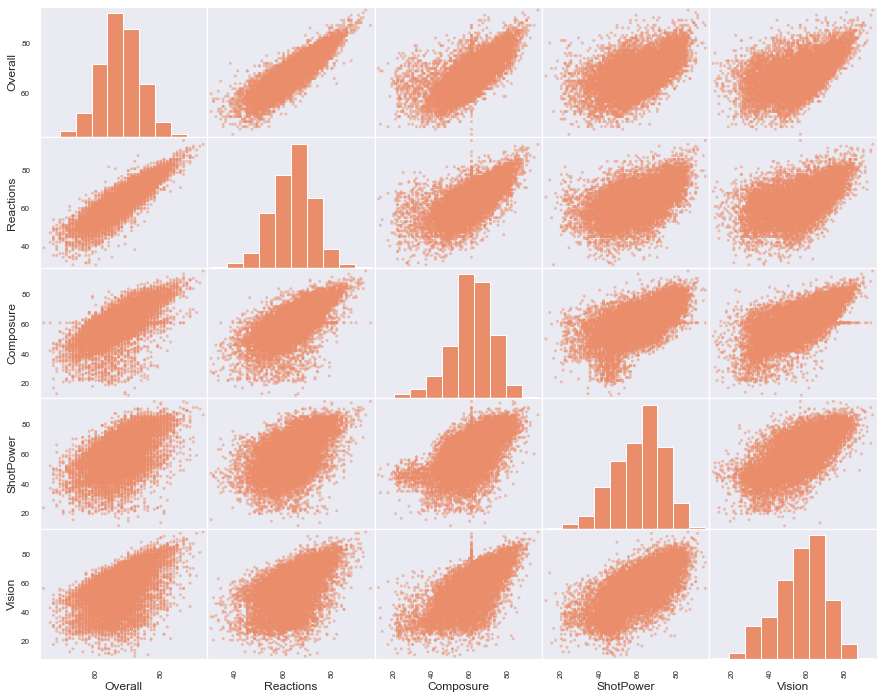

In [75]:
from pandas.plotting import scatter_matrix
attributes = ['Overall', 'Reactions', 'Composure', 'ShotPower', 'Vision']
scatter_matrix(fifa_df[attributes], figsize=(15,12))
plt.show()

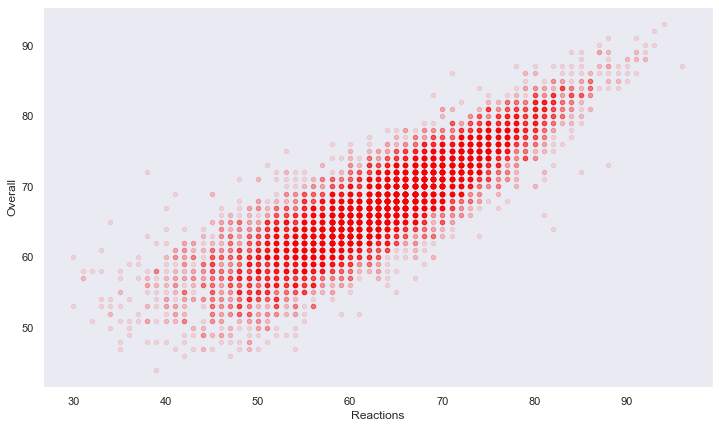

In [76]:
fifa_df.plot(kind="scatter", x="Reactions", y="Overall", alpha=0.1, color="red")
plt.show()

In [77]:
y_train = train_set['Overall']
X_train = train_set.drop('Overall', axis=1)
y_test = test_set['Overall']
X_test = test_set.drop('Overall', axis=1)

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [79]:
from sklearn.metrics import mean_squared_error
y_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.318773013162364

In [80]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [81]:
y_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, y_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [82]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.479507612940341

In [84]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
display_scores(lin_reg_scores)

Scores: [2.29031172 2.37753856 2.33152832 2.30787788 2.2522044  2.31014363
 2.40153034 2.36749112 2.35337611 2.27066769]
Mean: 2.3262669789813994
Standard Deviation: 0.0460682244809026


In [85]:
scores = cross_val_score(tree_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
tree_scores = np.sqrt(-scores)
display_scores(tree_scores)

Scores: [2.02064883 2.08244434 2.13774009 2.03245911 2.02286851 2.11275289
 2.07073854 2.22348921 2.17463604 2.03211491]
Mean: 2.0909892472963576
Standard Deviation: 0.06646472960485625


In [86]:
scores = cross_val_score(forest_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores)
display_scores(forest_scores)

Scores: [1.30215916 1.27175342 1.30124102 1.18498661 1.25976856 1.25891932
 1.21868331 1.32911902 1.41844147 1.26911552]
Mean: 1.2814187409409405
Standard Deviation: 0.06027293256869252


In [89]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [90]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1.2427503715294415

In [91]:
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([1.10405271, 1.36745186])

# Prediction

In [94]:
some_points = X_test.iloc[:5]
some_label = y_test.iloc[:5]
print("Predictions:", final_model.predict(some_data))
print("Labels:", list(some_label))

Predictions: [71.83333333 68.7        59.8        63.26666667 67.63333333]
Labels: [72, 67, 61, 63, 69]


# Best formation and Team for the word cup 2022 

In [87]:
fifa_df4_copy = fifa_df4.copy()

In [88]:
fifa_df4_copy["Value"] = fifa_copy["Value"]
fifa_df4_copy

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
82,K. Mbappé,22,France,91,95,Paris Saint-Germain,€194M,230000.0,2175,Right,4.0,4.0,5.0,High/ Low,Unique,Yes,ST,7.0,"Jul 1, 2018",NaN,2022,182cm,73.0,78.0,93.0,72.0,85.0,83.0,93.0,80.0,69.0,71.0,91.0,97.0,97.0,92.0,93.0,83.0,86.0,78.0,88.0,77.0,82.0,62.0,38.0,92.0,82.0,79.0,88.0,NaN,34.0,32.0,13.0,5.0,7.0,11.0,6.0,ST,92.0,€373.5M,26.0
251,E. Haaland,20,Norway,88,93,Borussia Dortmund,€137.5M,110000.0,2102,Left,4.0,3.0,3.0,High/ High,Unique,Yes,RS,9.0,"Jan 1, 2020",NaN,2024,194cm,94.0,47.0,94.0,69.0,77.0,88.0,78.0,77.0,62.0,51.0,85.0,82.0,94.0,75.0,88.0,72.0,94.0,74.0,82.0,93.0,87.0,85.0,43.0,89.0,71.0,76.0,84.0,NaN,43.0,30.0,7.0,14.0,13.0,11.0,7.0,ST,90.0,€244.1M,44.0
39,H. Kane,27,England,90,90,Tottenham Hotspur,€129.5M,240000.0,2205,Right,4.0,5.0,3.0,High/ High,Unique,Yes,ST,10.0,"Jul 28, 2010",NaN,2024,188cm,89.0,80.0,94.0,86.0,85.0,88.0,83.0,83.0,65.0,86.0,85.0,65.0,74.0,71.0,92.0,70.0,91.0,79.0,83.0,85.0,86.0,80.0,44.0,94.0,87.0,91.0,91.0,NaN,36.0,38.0,8.0,10.0,11.0,14.0,11.0,ST,90.0,€246.1M,50.0
64,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,€129M,270000.0,2183,Right,5.0,5.0,5.0,High/ Medium,Unique,Yes,LW,10.0,"Aug 3, 2017",NaN,2025,175cm,68.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,NaN,32.0,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0
3,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,350000.0,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,RCM,17.0,"Aug 30, 2015",NaN,2025,181cm,70.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16527,I. Al Kaabi,28,United Arab Emirates,59,62,NaN,€0,0.0,910,Right,1.0,3.0,1.0,Medium/ Medium,Normal (170-185),No,ST,NaN,NaN,NaN,NaN,183cm,82.0,13.0,9.0,10.0,24.0,6.0,13.0,10.0,10.0,17.0,16.0,34.0,33.0,23.0,54.0,47.0,44.0,60.0,26.0,46.0,8.0,24.0,10.0,5.0,30.0,19.0,31.0,NaN,10.0,11.0,59.0,55.0,58.0,58.0,60.0,GK,59.0,NaN,8.0
16540,21 H. Al Mansoury,24,United Arab Emirates,58,63,NaN,€0,0.0,904,Right,1.0,2.0,1.0,Medium/ Medium,Normal (170-185),No,ST,NaN,NaN,NaN,NaN,179cm,70.0,12.0,5.0,10.0,20.0,6.0,5.0,14.0,13.0,20.0,16.0,33.0,40.0,38.0,55.0,43.0,38.0,50.0,27.0,47.0,7.0,26.0,14.0,8.0,29.0,18.0,40.0,NaN,13.0,10.0,56.0,59.0,51.0,55.0,60.0,GK,58.0,NaN,6.0
16572,10 I. Baraclough,38,England,44,65,NaN,€0,0.0,891,Left,2.0,3.0,1.0,N/A/ N/A,NaN,NaN,ST,NaN,NaN,NaN,NaN,185cm,81.0,26.0,20.0,41.0,51.0,NaN,32.0,NaN,29.0,46.0,47.0,25.0,26.0,NaN,39.0,NaN,24.0,NaN,45.0,54.0,20.0,44.0,61.0,55.0,NaN,57.0,NaN,43.0,41.0,NaN,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN
16585,21 E. Ira Tape,22,Côte d'Ivoire,61,70,NaN,€0,0.0,886,Right,1.0,3.0,1.0,Medium/ Medium,Normal (185+),No,SUB,1.0,NaN,NaN,NaN,192cm,85.0,15.0,9.0,13.0,19.0,8.0,6.0,15.0,11.0,24.0,15.0,30.0,19.0,25.0,47.0,30.0,39.0,35.0,17.0,65.0,10.0,27.0,15.0,8.0,35.0,20.0,39.0,NaN,12.0,11.0,66.0,58.0,52.0,58.0,66.0,GK,61.0,NaN,6.0


In [89]:
fifa_df4_copy["Wage"] = fifa_copy["Wage"]
fifa_df4_copy

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
82,K. Mbappé,22,France,91,95,Paris Saint-Germain,€194M,€230K,2175,Right,4.0,4.0,5.0,High/ Low,Unique,Yes,ST,7.0,"Jul 1, 2018",NaN,2022,182cm,73.0,78.0,93.0,72.0,85.0,83.0,93.0,80.0,69.0,71.0,91.0,97.0,97.0,92.0,93.0,83.0,86.0,78.0,88.0,77.0,82.0,62.0,38.0,92.0,82.0,79.0,88.0,NaN,34.0,32.0,13.0,5.0,7.0,11.0,6.0,ST,92.0,€373.5M,26.0
251,E. Haaland,20,Norway,88,93,Borussia Dortmund,€137.5M,€110K,2102,Left,4.0,3.0,3.0,High/ High,Unique,Yes,RS,9.0,"Jan 1, 2020",NaN,2024,194cm,94.0,47.0,94.0,69.0,77.0,88.0,78.0,77.0,62.0,51.0,85.0,82.0,94.0,75.0,88.0,72.0,94.0,74.0,82.0,93.0,87.0,85.0,43.0,89.0,71.0,76.0,84.0,NaN,43.0,30.0,7.0,14.0,13.0,11.0,7.0,ST,90.0,€244.1M,44.0
39,H. Kane,27,England,90,90,Tottenham Hotspur,€129.5M,€240K,2205,Right,4.0,5.0,3.0,High/ High,Unique,Yes,ST,10.0,"Jul 28, 2010",NaN,2024,188cm,89.0,80.0,94.0,86.0,85.0,88.0,83.0,83.0,65.0,86.0,85.0,65.0,74.0,71.0,92.0,70.0,91.0,79.0,83.0,85.0,86.0,80.0,44.0,94.0,87.0,91.0,91.0,NaN,36.0,38.0,8.0,10.0,11.0,14.0,11.0,ST,90.0,€246.1M,50.0
64,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,€129M,€270K,2183,Right,5.0,5.0,5.0,High/ Medium,Unique,Yes,LW,10.0,"Aug 3, 2017",NaN,2025,175cm,68.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,NaN,32.0,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0
3,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,€350K,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,RCM,17.0,"Aug 30, 2015",NaN,2025,181cm,70.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16527,I. Al Kaabi,28,United Arab Emirates,59,62,NaN,€0,€0,910,Right,1.0,3.0,1.0,Medium/ Medium,Normal (170-185),No,ST,NaN,NaN,NaN,NaN,183cm,82.0,13.0,9.0,10.0,24.0,6.0,13.0,10.0,10.0,17.0,16.0,34.0,33.0,23.0,54.0,47.0,44.0,60.0,26.0,46.0,8.0,24.0,10.0,5.0,30.0,19.0,31.0,NaN,10.0,11.0,59.0,55.0,58.0,58.0,60.0,GK,59.0,NaN,8.0
16540,21 H. Al Mansoury,24,United Arab Emirates,58,63,NaN,€0,€0,904,Right,1.0,2.0,1.0,Medium/ Medium,Normal (170-185),No,ST,NaN,NaN,NaN,NaN,179cm,70.0,12.0,5.0,10.0,20.0,6.0,5.0,14.0,13.0,20.0,16.0,33.0,40.0,38.0,55.0,43.0,38.0,50.0,27.0,47.0,7.0,26.0,14.0,8.0,29.0,18.0,40.0,NaN,13.0,10.0,56.0,59.0,51.0,55.0,60.0,GK,58.0,NaN,6.0
16572,10 I. Baraclough,38,England,44,65,NaN,€0,€0,891,Left,2.0,3.0,1.0,N/A/ N/A,NaN,NaN,ST,NaN,NaN,NaN,NaN,185cm,81.0,26.0,20.0,41.0,51.0,NaN,32.0,NaN,29.0,46.0,47.0,25.0,26.0,NaN,39.0,NaN,24.0,NaN,45.0,54.0,20.0,44.0,61.0,55.0,NaN,57.0,NaN,43.0,41.0,NaN,5.0,20.0,46.0,20.0,20.0,CM,46.0,NaN,NaN
16585,21 E. Ira Tape,22,Côte d'Ivoire,61,70,NaN,€0,€0,886,Right,1.0,3.0,1.0,Medium/ Medium,Normal (185+),No,SUB,1.0,NaN,NaN,NaN,192cm,85.0,15.0,9.0,13.0,19.0,8.0,6.0,15.0,11.0,24.0,15.0,30.0,19.0,25.0,47.0,30.0,39.0,35.0,17.0,65.0,10.0,27.0,15.0,8.0,35.0,20.0,39.0,NaN,12.0,11.0,66.0,58.0,52.0,58.0,66.0,GK,61.0,NaN,6.0


In [90]:
selected_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage',
    'Position' ,
]
fifa_bf1 = pd.DataFrame(fifa_df4_copy, columns=selected_columns)
fifa_bf2 = fifa_bf1.sort_values("Overall", ascending=False)
fifa_bf2.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position
29,L. Messi,34,Argentina,93,93,Paris Saint-Germain,€78M,€320K,RW
33,R. Lewandowski,32,Poland,92,92,FC Bayern München,€119.5M,€270K,ST
36,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,€45M,€270K,ST
14244,J. Oblak,28,Slovenia,91,93,Atlético de Madrid,€112M,€130K,GK
82,K. Mbappé,22,France,91,95,Paris Saint-Germain,€194M,€230K,ST
3,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,€350K,RCM
64,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,€129M,€270K,LW
39,H. Kane,27,England,90,90,Tottenham Hotspur,€129.5M,€240K,ST
13890,M. ter Stegen,29,Germany,90,92,FC Barcelona,€99M,€250K,GK
12350,M. Neuer,35,Germany,90,90,FC Bayern München,€13.5M,€86K,GK


In [91]:
fifa_bf1.isnull().sum()

Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           264
Value            0
Wage             0
Position         0
dtype: int64

In [92]:
fifa_bf1.describe()

,Age,Overall,Potential
count,16710.000000,16710.000000,16710.000000
mean,25.727409,67.646320,72.572292
std,5.048910,6.457695,5.688085
min,16.000000,28.000000,38.000000
25%,22.000000,63.000000,69.000000
50%,25.000000,68.000000,72.000000
75%,29.000000,72.000000,76.000000
max,54.000000,93.000000,95.000000


In [93]:
fifa_bf1.reset_index(drop=True, inplace=True)
fifa_bf1

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position
0,K. Mbappé,22,France,91,95,Paris Saint-Germain,€194M,€230K,ST
1,E. Haaland,20,Norway,88,93,Borussia Dortmund,€137.5M,€110K,RS
2,H. Kane,27,England,90,90,Tottenham Hotspur,€129.5M,€240K,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,€129M,€270K,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,€125.5M,€350K,RCM
...,...,...,...,...,...,...,...,...,...
16705,I. Al Kaabi,28,United Arab Emirates,59,62,NaN,€0,€0,ST
16706,21 H. Al Mansoury,24,United Arab Emirates,58,63,NaN,€0,€0,ST
16707,10 I. Baraclough,38,England,44,65,NaN,€0,€0,ST
16708,21 E. Ira Tape,22,Côte d'Ivoire,61,70,NaN,€0,€0,SUB


In [94]:
fifa_bf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16710 non-null  object
 1   Age          16710 non-null  int64 
 2   Nationality  16710 non-null  object
 3   Overall      16710 non-null  int64 
 4   Potential    16710 non-null  int64 
 5   Club         16446 non-null  object
 6   Value        16710 non-null  object
 7   Wage         16710 non-null  object
 8   Position     16710 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


# Function for Best squad

In [95]:
def best_squad_2022(formation, nationality, measurement = 'Overall'):
    fifa_bf2 = fifa_bf1.copy()
    fifa_bf2 = fifa_bf2[fifa_bf2['Nationality'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            fifa_bf2.loc[[fifa_bf2[fifa_bf2['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            fifa_bf2.loc[[fifa_bf2[fifa_bf2['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            fifa_bf2[fifa_bf2['Position'].str.contains(i)][measurement].max(),
            fifa_bf2.loc[[fifa_bf2[fifa_bf2['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            fifa_bf2.loc[[fifa_bf2[fifa_bf2['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            fifa_bf2.loc[[fifa_bf2[fifa_bf2['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            fifa_bf2.loc[[fifa_bf2[fifa_bf2['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        
        fifa_bf2.drop(fifa_bf2[fifa_bf2['Position'].str.contains(i)][measurement].idxmax(), 
                         inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                                                                 columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

# Function for best formation

In [96]:
def get_team_formation(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = best_squad_2022(formation = j, nationality = i, measurement = 'Overall')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2)])    
            count += 1
    
    return summary

In [97]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

# Best formation and squad for France

In [98]:
France = pd.DataFrame(np.array(get_team_formation(squad_list, squad_name, ['France'])), columns = ['Nationality', 'Squad', 'Overall']) 
France.set_index('Nationality', inplace = True) 
France['Overall'] = France['Overall'].astype(float)  
print (France)

               Squad  Overall
Nationality                  
France         3-4-3    84.64
France         4-4-2    85.09
France       4-3-1-2    85.64
France         4-3-3    84.82
France       4-2-3-1    84.82


In [99]:
rating_4312_FR_Overall, best_list_4312_FR_Overall = best_squad_2022(squad_4312_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_FR_Overall))
print(best_list_4312_FR_Overall)

-Overall-
Average rating: 85.6
Position          Player Overall  Age                  Club    Value    Wage
      GK       H. Lloris      87   34     Tottenham Hotspur   €13.5M   €125K
      RB      N. Mukiele      81   23            RB Leipzig   €34.5M    €65K
     RCB       R. Varane      86   28     Manchester United   €68.5M   €180K
     RCB       J. Koundé      83   22            Sevilla FC     €53M    €33K
      LB    T. Hernández      84   23              AC Milan   €62.5M    €51K
     RCM        N. Kanté      90   30               Chelsea    €100M   €230K
     CAM        N. Fekir      84   27   Real Betis Balompié     €45M    €42K
     LCM        T. Lemar      83   25    Atlético de Madrid     €48M    €71K
      CF      K. Benzema      89   33        Real Madrid CF     €66M   €350K
      ST       K. Mbappé      91   22   Paris Saint-Germain    €194M   €230K
      ST   W. Ben Yedder      84   30             AS Monaco   €41.5M    €88K


In [100]:
rating_433_FR_Overall, best_list_433_FR_Overall = best_squad_2022(squad_433_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
print(best_list_433_FR_Overall)

-Overall-
Average rating: 84.8
Position         Player Overall  Age                  Club    Value    Wage
      GK      H. Lloris      87   34     Tottenham Hotspur   €13.5M   €125K
      RB     N. Mukiele      81   23            RB Leipzig   €34.5M    €65K
     RCB      R. Varane      86   28     Manchester United   €68.5M   €180K
     RCB      J. Koundé      83   22            Sevilla FC     €53M    €33K
      LB   T. Hernández      84   23              AC Milan   €62.5M    €51K
     RCM       N. Kanté      90   30               Chelsea    €100M   €230K
     CAM       N. Fekir      84   27   Real Betis Balompié     €45M    €42K
     LCM       T. Lemar      83   25    Atlético de Madrid     €48M    €71K
      RW     O. Dembélé      83   24          FC Barcelona     €55M   €165K
      ST      K. Mbappé      91   22   Paris Saint-Germain    €194M   €230K
      LM       M. Diaby      81   21   Bayer 04 Leverkusen   €52.5M    €52K


# England

In [101]:
England = pd.DataFrame(np.array(get_team_formation(squad_list, squad_name, ['England'])), columns = ['Nationality', 'Squad', 'Overall']) 
England.set_index('Nationality', inplace = True) 
England['Overall'] = England['Overall'].astype(float)  
print (England)

               Squad  Overall
Nationality                  
England        3-4-3    84.00
England        4-4-2    84.18
England      4-3-1-2    83.36
England        4-3-3    84.18
England      4-2-3-1    84.18


In [102]:
rating_4231_FR_Overall, best_list_4231_FR_Overall = best_squad_2022(squad_4231_strict, 'England', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_FR_Overall))
print(best_list_4231_FR_Overall)

-Overall-
Average rating: 84.2
Position                Player Overall  Age                Club     Value    Wage
      GK           J. Pickford      83   27             Everton      €33M    €83K
      RB   T. Alexander-Arnold      87   22           Liverpool     €114M   €150K
     LCB            H. Maguire      84   28   Manchester United    €42.5M   €155K
     RCB          J. Tarkowski      81   28             Burnley    €24.5M    €46K
      LB               L. Shaw      84   25   Manchester United    €48.5M   €140K
     RCM          J. Henderson      84   31           Liverpool    €29.5M   €140K
     RCM        J. Ward-Prowse      81   26         Southampton    €33.5M    €69K
      RW              M. Mount      83   22             Chelsea    €58.5M   €120K
     CAM           J. Maddison      82   24      Leicester City    €41.5M   €100K
      LM             J. Sancho      87   21   Manchester United   €116.5M   €150K
      ST               H. Kane      90   27   Tottenham Hotspur   €

# Brazil

In [103]:
Brazil = pd.DataFrame(np.array(get_team_formation(squad_list, squad_name, ['Brazil'])), columns = ['Nationality', 'Squad', 'Overall']) 
Brazil.set_index('Nationality', inplace = True) 
Brazil['Overall'] = Brazil['Overall'].astype(float)  
print (Brazil)

               Squad  Overall
Nationality                  
Brazil         3-4-3    85.73
Brazil         4-4-2    84.55
Brazil       4-3-1-2    84.82
Brazil         4-3-3    85.91
Brazil       4-2-3-1    85.82


In [104]:
rating_433_FR_Overall, best_list_433_FR_Overall = best_squad_2022(squad_433_strict, 'Brazil', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
print(best_list_433_FR_Overall)

-Overall-
Average rating: 85.9
Position            Player Overall  Age                  Club    Value    Wage
      GK           Ederson      89   27       Manchester City     €94M   €200K
      RB     19 Dani Alves      82   35   Paris Saint-Germain    €4.8M    €60K
     RCB        Marquinhos      87   27   Paris Saint-Germain   €90.5M   €135K
      CB      Thiago Silva      85   36               Chelsea    €9.5M   €105K
      LB    19 Filipe Luís      85   32    Atlético de Madrid   €21.5M    €80K
     CDM          Casemiro      89   29        Real Madrid CF     €88M   €310K
     CDM           Fabinho      86   27             Liverpool   €73.5M   €165K
     CDM          Fernando      84   33            Sevilla FC     €21M    €43K
      RM          Raphinha      82   24          Leeds United     €46M    €89K
      CF   Roberto Firmino      85   29             Liverpool     €54M   €185K
      LW         Neymar Jr      91   29   Paris Saint-Germain    €129M   €270K


# Spain

In [105]:
Spain = pd.DataFrame(np.array(get_team_formation(squad_list, squad_name, ['Spain'])), columns = ['Nationality', 'Squad', 'Overall']) 
Spain.set_index('Nationality', inplace = True) 
Spain['Overall'] = Spain['Overall'].astype(float)  
print (Spain)

               Squad  Overall
Nationality                  
Spain          3-4-3    85.64
Spain          4-4-2    85.36
Spain        4-3-1-2    85.55
Spain          4-3-3    85.82
Spain        4-2-3-1    85.73


In [106]:
rating_433_FR_Overall, best_list_433_FR_Overall = best_squad_2022(squad_433_strict, 'Spain', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
print(best_list_433_FR_Overall)

-Overall-
Average rating: 85.8
Position            Player Overall  Age                  Club    Value    Wage
      GK            De Gea      84   30     Manchester United     €28M   €120K
      RB          Carvajal      85   29        Real Madrid CF   €47.5M   €210K
     LCB      Sergio Ramos      88   35   Paris Saint-Germain     €24M   €115K
     LCB        A. Laporte      86   27       Manchester City     €77M   €185K
      LB        Jordi Alba      86   32          FC Barcelona     €47M   €200K
     CDM             Rodri      86   25       Manchester City     €81M   €175K
     LCM            Thiago      86   30             Liverpool     €65M   €180K
     LCM            Parejo      86   32         Villarreal CF   €53.5M    €64K
      RM   Marcos Llorente      86   26    Atlético de Madrid     €88M    €95K
      ST     Gerard Moreno      86   29         Villarreal CF     €68M    €73K
      LW         Oyarzabal      85   24         Real Sociedad   €77.5M    €57K


# Argentina

In [107]:
Argentina = pd.DataFrame(np.array(get_team_formation(squad_list, squad_name, ['Argentina'])), columns = ['Nationality', 'Squad', 'Overall']) 
Argentina.set_index('Nationality', inplace = True) 
Argentina['Overall'] = Argentina['Overall'].astype(float)  
print (Argentina)

               Squad  Overall
Nationality                  
Argentina      3-4-3    83.36
Argentina      4-4-2    82.18
Argentina    4-3-1-2    82.73
Argentina      4-3-3    84.18
Argentina    4-2-3-1    84.09


In [108]:
rating_433_FR_Overall, best_list_433_FR_Overall = best_squad_2022(squad_433_strict, 'Argentina', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
print(best_list_433_FR_Overall)

-Overall-
Average rating: 84.2
Position        Player Overall  Age                          Club    Value    Wage
      GK   E. Martínez      84   28                   Aston Villa   €33.5M    €81K
      RB     F. Bustos      77   25   Club Atlético Independiente     €13M    €14K
     RCB   20 E. Garay      83   32                   Valencia CF   €16.5M    €48K
     LCB   N. Otamendi      81   33                    SL Benfica   €12.5M    €18K
      LB      M. Acuña      84   29                    Sevilla FC     €37M    €45K
     LCM      A. Gómez      85   33                    Sevilla FC   €33.5M    €51K
     CAM     P. Dybala      87   27                      Juventus     €93M   €160K
     CAM     E. Banega      82   33                     Al Shabab     €15M    €46K
      RW      L. Messi      93   34           Paris Saint-Germain     €78M   €320K
      ST     S. Agüero      87   33                  FC Barcelona     €51M   €260K
      LW    L. Ocampos      83   26                    S

# Portugal

In [109]:
Portugal = pd.DataFrame(np.array(get_team_formation(squad_list, squad_name, ['Portugal'])), columns = ['Nationality', 'Squad', 'Overall']) 
Portugal.set_index('Nationality', inplace = True) 
Portugal['Overall'] = Portugal['Overall'].astype(float)  
print (Portugal)

               Squad  Overall
Nationality                  
Portugal       3-4-3    83.09
Portugal       4-4-2    83.55
Portugal     4-3-1-2    83.64
Portugal       4-3-3    83.73
Portugal     4-2-3-1    83.73


In [110]:
rating_4231_FR_Overall, best_list_4231_FR_Overall = best_squad_2022(squad_4231_strict, 'Portugal', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_FR_Overall))
print(best_list_4231_FR_Overall)

-Overall-
Average rating: 83.7
Position              Player Overall  Age                      Club     Value    Wage
      GK            A. Lopes      82   30        Olympique Lyonnais      €23M    €60K
      RB     Ricardo Pereira      84   27            Leicester City    €40.5M   €130K
     RCB          Rúben Dias      87   24           Manchester City   €102.5M   €170K
     RCB                Pepe      82   38                  FC Porto     €5.5M    €14K
      LB        João Cancelo      86   27           Manchester City    €71.5M   €185K
     RCM         Rúben Neves      82   24   Wolverhampton Wanderers      €46M    €89K
     CDM            Palhinha      82   25               Sporting CP      €41M    €18K
      RW                Rafa      82   28                SL Benfica    €30.5M    €22K
     CAM     Bruno Fernandes      88   26         Manchester United   €107.5M   €250K
     LWB       Rúben Vinagre      75   22               Sporting CP      €12M    €49K
      ST   Cristiano Ro

# Belgium

In [111]:
Belgium = pd.DataFrame(np.array(get_team_formation(squad_list, squad_name, ['Belgium'])), columns = ['Nationality', 'Squad', 'Overall']) 
Belgium.set_index('Nationality', inplace = True) 
Belgium['Overall'] = Belgium['Overall'].astype(float)  
print (Belgium)

               Squad  Overall
Nationality                  
Belgium        3-4-3    83.00
Belgium        4-4-2    81.91
Belgium      4-3-1-2    81.82
Belgium        4-3-3    82.91
Belgium      4-2-3-1    82.64


In [112]:
rating_343_FR_Overall, best_list_343_FR_Overall = best_squad_2022(squad_343_strict, 'Belgium', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_343_FR_Overall))
print(best_list_343_FR_Overall)

-Overall-
Average rating: 83.0
Position            Player Overall  Age                   Club     Value    Wage
      GK       T. Courtois      89   29         Real Madrid CF    €85.5M   €250K
     RCB   T. Alderweireld      83   32                    NaN        €0      €0
     RCB     20 V. Kompany      82   33         RSC Anderlecht    €10.5M    €29K
     LCB     J. Vertonghen      81   34             SL Benfica     €8.5M    €18K
      RB        T. Meunier      77   29      Borussia Dortmund     €9.5M    €48K
     RCM      K. De Bruyne      91   30        Manchester City   €125.5M   €350K
     CDM         A. Witsel      83   32      Borussia Dortmund      €24M    €72K
     LWB        J. Kayembe      74   26   Royal Charleroi S.C.     €4.5M    €13K
      RW        A. Januzaj      81   26          Real Sociedad      €28M    €45K
      ST         R. Lukaku      88   28                Chelsea    €93.5M   €260K
      LM       Y. Carrasco      84   27     Atlético de Madrid      €45M    €8

# Germany

In [113]:
Germany = pd.DataFrame(np.array(get_team_formation(squad_list, squad_name, ['Germany'])), columns = ['Nationality', 'Squad', 'Overall']) 
Germany.set_index('Nationality', inplace = True) 
Germany['Overall'] = Germany['Overall'].astype(float)  
print (Germany)

               Squad  Overall
Nationality                  
Germany        3-4-3    84.73
Germany        4-4-2    84.36
Germany      4-3-1-2    84.45
Germany        4-3-3    85.09
Germany      4-2-3-1    85.09


In [114]:
rating_4231_FR_Overall, best_list_4231_FR_Overall = best_squad_2022(squad_4231_strict, 'Germany', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_FR_Overall))
print(best_list_4231_FR_Overall)

-Overall-
Average rating: 85.1
Position          Player Overall  Age                       Club    Value    Wage
      GK   M. ter Stegen      90   29               FC Barcelona     €99M   €250K
      RB      17 P. Lahm      88   32          FC Bayern München   €29.5M   €200K
     LCB      M. Hummels      86   32          Borussia Dortmund     €44M    €95K
     RCB       M. Ginter      84   27   Borussia Mönchengladbach   €42.5M    €45K
      LB          P. Max      80   27                        PSV     €22M    €22K
     LCM        T. Kroos      88   31             Real Madrid CF     €75M   €310K
     LCM     I. Gündoğan      85   30            Manchester City   €51.5M   €185K
      RM       S. Gnabry      85   25          FC Bayern München   €64.5M   €110K
     CAM       T. Müller      87   31          FC Bayern München     €66M   €140K
      LW      K. Havertz      84   22                    Chelsea   €94.5M   €130K
      ST     16 M. Klose      79   37                      Lazio   

# Netherlands

In [115]:
Netherlands = pd.DataFrame(np.array(get_team_formation(squad_list, squad_name, ['Netherlands'])), columns = ['Nationality', 'Squad', 'Overall']) 
Netherlands.set_index('Nationality', inplace = True) 
Netherlands['Overall'] = Netherlands['Overall'].astype(float)  
print (Netherlands)

               Squad  Overall
Nationality                  
Netherlands    3-4-3    84.09
Netherlands    4-4-2    83.45
Netherlands  4-3-1-2    84.09
Netherlands    4-3-3    83.82
Netherlands  4-2-3-1    83.82


In [116]:
rating_343_FR_Overall, best_list_343_FR_Overall = best_squad_2022(squad_343_strict, 'Netherlands', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_343_FR_Overall))
print(best_list_343_FR_Overall)

-Overall-
Average rating: 84.1
Position              Player Overall  Age                Club     Value    Wage
      GK   11 E. van der Sar      83   39   Manchester United        €0      €0
     LCB         V. van Dijk      89   29           Liverpool      €86M   €230K
     LCB          M. de Ligt      85   21            Juventus      €75M    €81K
      CB          S. de Vrij      85   29               Inter      €45M   €145K
      RB         R. Karsdorp      78   26                Roma    €16.5M    €51K
     RCM          F. de Jong      87   24        FC Barcelona   €119.5M   €210K
      CM          07 P. Cocu      87   35                 PSV        €0      €0
      LB            D. Blind      82   31                Ajax      €21M    €23K
      RM           C. Stengs      77   22            OGC Nice    €21.5M    €28K
      ST   09 H. de Noteboom      87   32              111648        €0      €0
      LW            M. Depay      85   27        FC Barcelona      €63M   €220K


# Thank You